In [2]:
# %matplotlib inline
%pylab inline
import scipy
from pyiga import bspline, assemble, vform, geometry, vis, solvers
import numpy as np
import matplotlib.pyplot as plt

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


(-0.25000000000000006, 5.250000000000001, -0.05, 1.05)

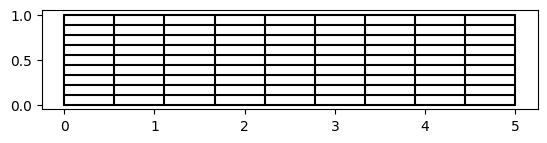

In [3]:
G = geometry.tensor_product(geometry.line_segment(0,1),
                            geometry.line_segment(0,5, intervals=3))
vis.plot_geo(G)
axis('scaled')

[1.14642601 1.12545898 1.06556172 0.97531535 0.86764894 0.75798723
 0.6620408  0.59355535 0.56234237 0.57287357 0.62364021 0.70736924
 0.8120653  0.9227292  1.02350677 1.0999602  1.14113646 1.14113646
 1.0999602  1.02350677 0.9227292  0.8120653  0.70736924 0.62364021
 0.57287357 0.56234237 0.59355535 0.6620408  0.75798723 0.86764894
 0.97531535 1.06556172 1.12545898 1.14642601 1.12545898 1.06556172
 0.97531535 0.86764894 0.75798723 0.6620408  0.59355535 0.56234237
 0.57287357 0.62364021 0.70736924 0.8120653  0.9227292  1.02350677
 1.0999602  1.14113646 1.14113646 1.0999602  1.02350677 0.9227292
 0.8120653  0.70736924 0.62364021 0.57287357 0.56234237 0.59355535
 0.6620408  0.75798723 0.86764894 0.97531535 1.06556172 1.12545898
 1.14642601 1.12545898 1.06556172 0.97531535 0.86764894 0.75798723
 0.6620408  0.59355535 0.56234237 0.57287357 0.62364021 0.70736924
 0.8120653  0.9227292  1.02350677 1.0999602  1.14113646 1.14113646
 1.0999602  1.02350677 0.9227292  0.8120653  0.70736924 0.62364

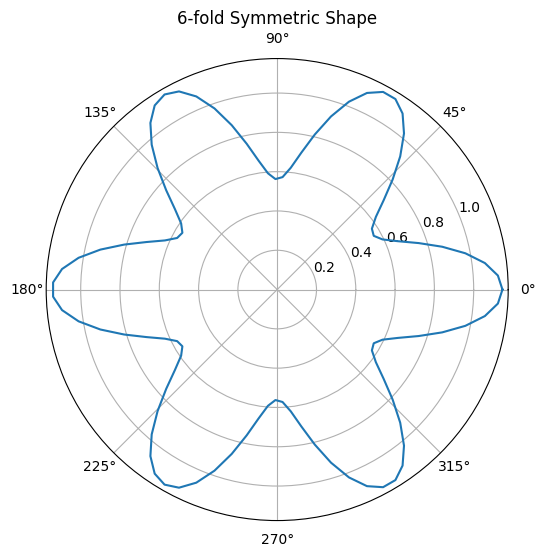

(array([ 1.14642601,  1.12319307,  1.05698907,  0.95769013,  0.83983966,
        0.72014177,  0.61461745,  0.53593688,  0.49140253,  0.48193192,
        0.50219891,  0.54187628,  0.5877193 ,  0.62608045,  0.64537492,
        0.63803952,  0.6016362 ,  0.53892574,  0.45693998,  0.36527546,
        0.2739771 ,  0.19145165,  0.12283338,  0.06912316,  0.02725842,
       -0.0089221 , -0.04703924, -0.09421823, -0.15524084, -0.23120572,
       -0.3189944 , -0.41167457, -0.49977876, -0.573213  , -0.62341431,
       -0.6453145 , -0.63869572, -0.60863394, -0.56490093, -0.52039922,
       -0.48889764, -0.48248043, -0.50919034, -0.57132207, -0.66470965,
       -0.77917095, -0.90005755, -1.01065039, -1.0949795 , -1.14056194,
       -1.14056194, -1.0949795 , -1.01065039, -0.90005755, -0.77917095,
       -0.66470965, -0.57132207, -0.50919034, -0.48248043, -0.48889764,
       -0.52039922, -0.56490093, -0.60863394, -0.63869572, -0.6453145 ,
       -0.62341431, -0.573213  , -0.49977876, -0.41167457, -0.3

In [4]:
def cal_c(r, a, L0):
    return np.sqrt(2)*np.sqrt(np.pi*(3+3*r**2+2*r)*a*L0)/(np.pi*(3+3*r**2+2*r))
def superformula(theta, r, d, n, a, L0):
    c = cal_c(r,a,L0)
    return c*((1+r)-d*(-1)**((n+2)/2)*(r-1)*np.cos(n*theta))
d = 0.8
r = 0.4
n = 6
a = 0.1
L0 = 25
theta_values = np.linspace(0, 2 * np.pi, 100)
result = superformula(theta_values, r, d, n, a, L0)
print(result)
plt.figure(figsize=(6, 6))
plt.polar(theta_values, result)
plt.title(f"{n}-fold Symmetric Shape")
plt.show()
def polar_to_cartesian(result, theta):
    x = result * np.cos(theta)
    y = result * np.sin(theta)
    return (x,y)
theta_values = np.linspace(0, 2 * np.pi, 100)
result = superformula(theta_values, r, d, n, a, L0)
print(polar_to_cartesian(result, theta_values))

(0.6424749656658818,
 2.064374907120528,
 -1.5556349186104046,
 1.5556349186104046)

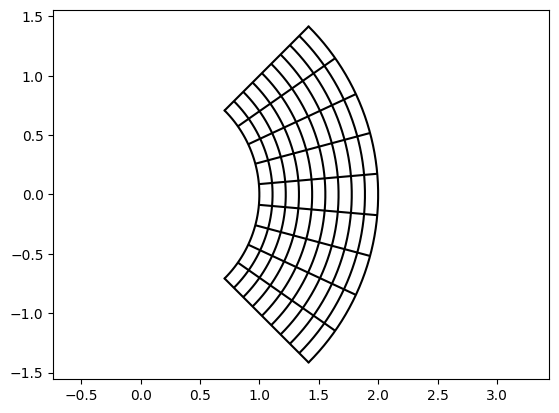

In [5]:
def f(x, y):
    r = 1 + x
    phi = (y - 0.5) * np.pi/2
    return (r * np.cos(phi), r * np.sin(phi))

f_func = geometry.UserFunction(f, [[0,1],[0,1]])
vis.plot_geo(f_func)
axis('equal')

(-0.3496445459483683,
 0.3563488511650937,
 -0.3135951982317723,
 0.31359519823177223)

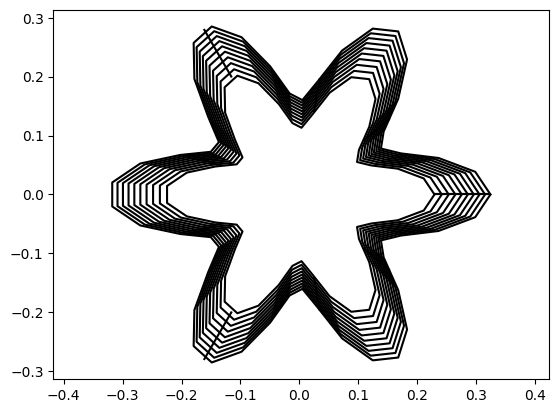

In [6]:
def cal_c(r, a, L0):
    return np.sqrt(2)*np.sqrt(np.pi*(3+3*r**2+2*r)*a*L0)/(np.pi*(3+3*r**2+2*r))
def polar_to_cartesian(result, theta):
    x = result * np.cos(theta)
    y = result * np.sin(theta)
    return (x,y)
def superformula_1(L0, theta):
    r = 0.4
    d = 0.8
    n = 6
    a = 0.1
    # L0 = 25
    c = cal_c(r,a,L0)
    res = c*((1+r)-d*(-1)**((n+2)/2)*(r-1)*np.cos(n*theta))
    return polar_to_cartesian(res,theta)
# theta_values = np.linspace(0, 2 * np.pi, 100)
# result = superformula_1(theta_values)
theta_lim = 2*np.pi
rad_lim = 2
f_func = geometry.UserFunction(superformula_1, [[0,theta_lim],[1,rad_lim]]) # Theta and radius need to switch order to work
vis.plot_geo(f_func)
axis('equal')

102
(102, 3)
(3, 3)


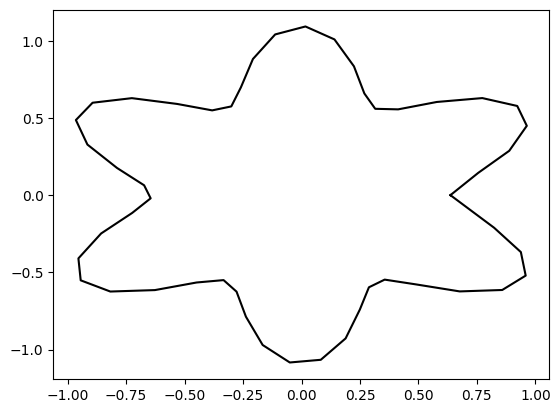

In [40]:
from pyiga.geometry import *
from pyiga import approx, bspline
kv = bspline.make_knots(3, 0.0, 1.0, 98)
# N = tuple(kv.numdofs for kv in kvs)
print(kv.numdofs)
r = 2.0
# construct quarter circle using NURBS
theta_values = np.linspace(0, 2 * np.pi, 102)
result = superformula(theta_values, r, d, n, a, L0)
coeff = np.array(polar_to_cartesian(result, theta_values))
w = np.ones((1,102))
coeff = np.vstack((coeff, w)).transpose()
print(coeff.shape)
coeffs = np.array([
        [  r, 1.0, 1.0],
        [  r,   r, 1.0 / np.sqrt(2.0)],
        [0.0,   r, 1.0]])
print(coeffs.shape)

grid = (np.linspace(0.0, 1.0, 2),)

nurbs = NurbsFunc((kv,), coeff.copy(), weights=None)
vals = nurbs.grid_eval(grid)
vis.plot_geo(nurbs, grid=grid,res=50, linewidth=None, color='black')

(-0.3496445459483683,
 0.3563488511650937,
 -0.3135951982317723,
 0.31359519823177223)

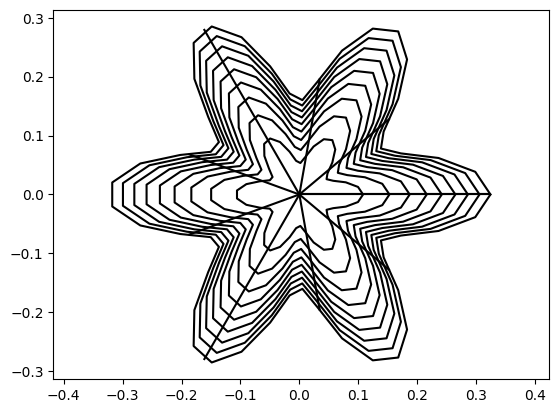

In [7]:
f_func = geometry.UserFunction(superformula_1, [[0,theta_lim],[0,rad_lim]]) # Theta and radius need to switch order to work
vis.plot_geo(f_func)
axis('equal')

(-4.391370649551413, 4.3995890785500675, -4.397739351283027, 4.397739351283027)

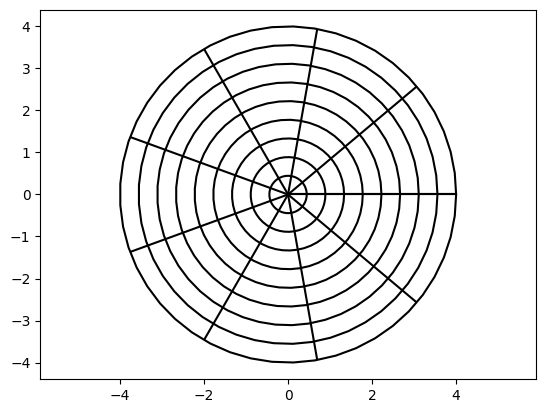

In [8]:
# Try to do simple circle to see if it meshes
def f(r,theta):
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    return (x, y)

theta_lim = 2*np.pi
rad_lim = 4
f_func = geometry.UserFunction(f, [[0,theta_lim],[0,rad_lim]]) # Theta and radius need to switch order to work
f_func1 = geometry.UserFunction(f, [[1,rad_lim],[0,theta_lim]]) # Theta and radius need to switch order to work

vis.plot_geo(f_func)
axis('equal')

<bound method NurbsFunc.as_vector of <pyiga.geometry.NurbsFunc object at 0x000001EE45F2BCA0>>


(-0.09999999999999995, 2.1, -0.1, 2.1)

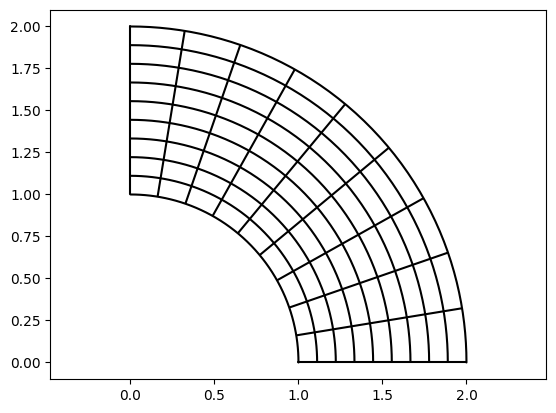

In [9]:
print(f_func)
print(geometry.line_segment(0,5, intervals=3))
f = geometry.circular_arc(pi/2)
print(f.as_vector)
vis.plot_geo(geometry.outer_product(f, geometry.line_segment(1, 2)))
axis('equal')

(-0.25000000000000006, 5.250000000000001, -0.05, 1.05)

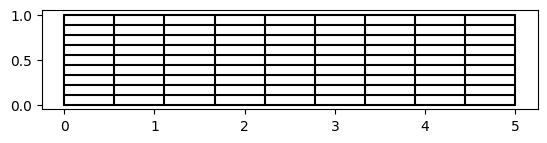

In [10]:
G = geometry.tensor_product(geometry.line_segment(0,1),
                            geometry.line_segment(0,5, intervals=3))
vis.plot_geo(G)
axis('scaled')

(0.6424749656658818,
 2.064374907120528,
 -1.5556349186104046,
 1.5556349186104046)

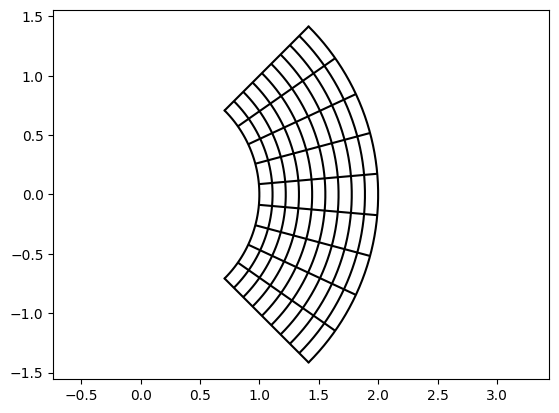

In [11]:
def f(x, y):
    r = 1 + x
    phi = (y - 0.5) * np.pi/2
    return (r * np.cos(phi), r * np.sin(phi))

f_func = geometry.UserFunction(f, [[0,1],[0,1]])
vis.plot_geo(f_func)
axis('equal')

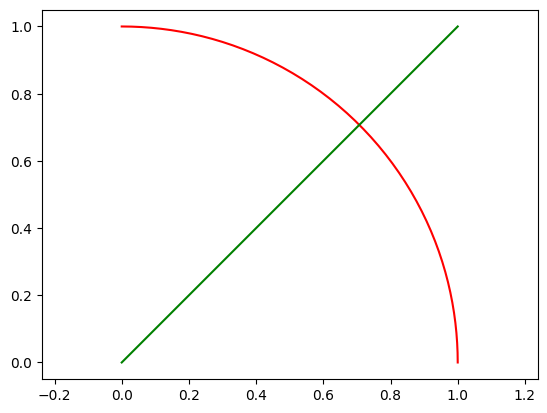

In [12]:
f = geometry.circular_arc(pi/2)
g = geometry.line_segment([0,0], [1,1])

vis.plot_geo(f, color='red')
vis.plot_geo(g, color='green')
axis('equal');

In [13]:
f

In [14]:
f_func